### Data visualization 

Here we have different graphical properties that are typically available. 
+    Position on the axis
+    Length/width of line
+    Orientation of line or object
+    Area of shape
+    Volume of shape
+    Color and textural indicators

These elements are ranked according to priority.

Of course, color is a tempting property that one can use, but be aware that it may be hard to distinguish a palette with many colors used on the same graph (see example below extracted from https://blog.hubspot.com/marketing/blog-strategy-quality-quantity). Thats why contrast qualitative palettes are commonly used. Same with textures. It is also important to try to use colorblind friendly palettes.

<img src = "https://github.com/barcelonagse-datascience/academic_files/raw/master/images/SampleColorLinePlot.png">

#### Other possibilities
+ User interaction/exploration (shiny apps, for example)
+ Updating: analytics, sources of data.

### Criteria to encode our data
There are two main factors to take into account when deciding how to encode one dimension of our data into one graphical property (color, shape, position, etc.):

+ ***Natural ordering***: If our data is ordered (e.g. quantities), we should pick graphical properties that have also a natural order (e.g. position, length, size), and avoid the non-ordered ones (e.g. shape, texture). Colors can have an order if we pick palette with some caution (variations of saturation for same color)
+ ***Unique values***: One has to bear in mind the number of unique values in the data that we are trying to plot (e.g. *'country'* value). The selected graphical property (e.g. *shape*) must be able to encode all unique values so that we can distinguish them visually, according to the objective of the plot.


Check below decision table, extracted from the Steele and Iliinsky reference, for a comprehensive list per graphical properties.

<img src = "https://github.com/barcelonagse-datascience/academic_files/raw/master/images/EncodingGraphProperties.png">



## Simplified catalogue of data visualization plots



<table style="width:100%">
    <tr><th><img src = "https://github.com/barcelonagse-datascience/academic_files/raw/master/images/scatterplot.png" alt="drawing" width="300"></th><th><img src = "https://github.com/barcelonagse-datascience/academic_files/raw/master/images/bubblechart.png" alt="drawing" width="300"></th><th><img src = "https://github.com/barcelonagse-datascience/academic_files/raw/master/images/linegraph.png" alt="drawing" width="300"></th></tr>
        <tr><th><img src = "https://github.com/barcelonagse-datascience/academic_files/raw/master/images/fanchart.png" alt="drawing" width="300"></th><th><img src = "https://github.com/barcelonagse-datascience/academic_files/raw/master/images/areachart.png" alt="drawing" width="300"></th><th><img src = "https://github.com/barcelonagse-datascience/academic_files/raw/master/images/histogram.png" alt="drawing" width="300"></th></tr>
        <tr><th><img src = "https://github.com/barcelonagse-datascience/academic_files/raw/master/images/barchart.png" alt="drawing" width="300"></th><th><img src = "https://github.com/barcelonagse-datascience/academic_files/raw/master/images/boxplot.png" alt="drawing" width="300"></th><th><img src = "https://github.com/barcelonagse-datascience/academic_files/raw/master/images/violin.png" alt="drawing" width="300"></th></tr>
    <tr><th><img src = "https://github.com/barcelonagse-datascience/academic_files/raw/master/images/heatmap.png" alt="drawing" width="300"></th><th><img src = "https://github.com/barcelonagse-datascience/academic_files/raw/master/images/donutchart.png" alt="drawing" width="300"></th><th><img src = "https://github.com/barcelonagse-datascience/academic_files/raw/master/images/radialline.png" alt="drawing" width="300"></th></tr>
    <tr><th><img src = "https://github.com/barcelonagse-datascience/academic_files/raw/master/images/3dscatter.png" alt="drawing" width="300"></th><th><img src = "https://github.com/barcelonagse-datascience/academic_files/raw/master/images/map.png" alt="drawing" width="300"></th><th><img src = "https://github.com/barcelonagse-datascience/academic_files/raw/master/images/network.png" alt="drawing" width="300"></th></tr>
    
</table>

<a href="https://datavizproject.com/">Figure source </a> (more types of plots are shown there)


### Visualization in Python

In our limited timeframe, we are just going to cover a couple of libraries that allow plotting Python (mainly *matplotlib*,*seaborn* and *plotly*), but there are many of them. All libraries come with a different design flavor that you might want to explore. For some types of plots, *pandas* dataframes already have embedded functions. You can find some references to further packages at the end of this notebook.



In [3]:
# if you get errors, try uncommenting the next line:
# !pip install plotly.express
# Importing our libraries
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
from math import pi
from pandas.plotting import register_matplotlib_converters, scatter_matrix

### Scatter plots

We will start with a simple case with matplotlib, then will evolve a bit.

We will use the _mtcars_ dataset. Column description of mtcars data set is as follows:

+ mpg: 	Miles/(US) gallon
+ cyl: 	Number of cylinders
+ disp: 	Displacement (cu.in.)
+ hp: 	Gross horsepower
+ drat: 	Rear axle ratio
+ wt: 	Weight (1000 lbs)
+ qsec: 	1/4 mile time
+ vs: 	Engine (0 = V-shaped, 1 = straight)
+ am: 	Transmission (0 = automatic, 1 = manual)
+ gear: 	Number of forward gears
+ carb: 	Number of carburetors

Here we have a sample scatter plot of *horsepower* versus *qsec*, using *matplotlib* $scatter$ function.

In [10]:
# import the data
# from R repository


mtcars = pd.read_csv("https://github.com/barcelonagse-datascience/academic_files/raw/master/data/mtcars.csv")
print('Dimensions: \n%s, %s' % mtcars.shape)
print('Unique values: \n%s' % mtcars.nunique(axis=0))

Dimensions: 
32, 12
Unique values: 
model    32
mpg      25
cyl       3
disp     27
hp       22
drat     22
wt       29
qsec     30
vs        2
am        2
gear      3
carb      6
dtype: int64


In [12]:
mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


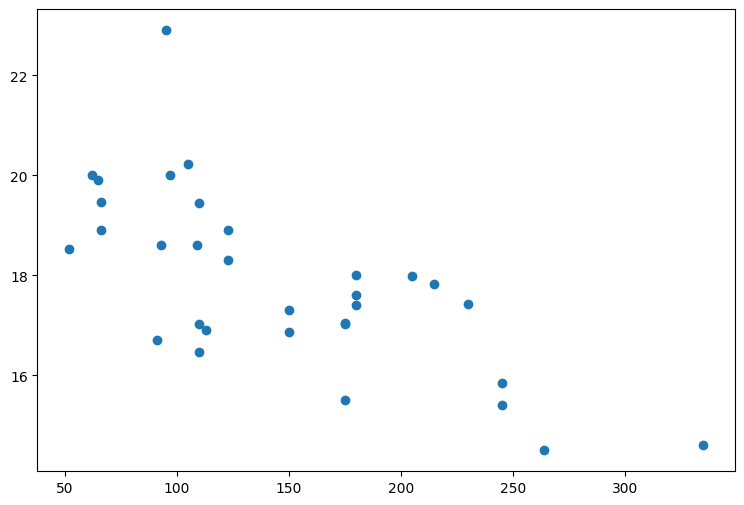

In [16]:
# for scatter plot, we just point to X, Y axies, plus some optional parameters 
plt.figure(figsize=(9, 6))
plt.scatter(mtcars['hp'], mtcars['qsec'])

Then we add axis labels, and extra layers that can be considered as categories.

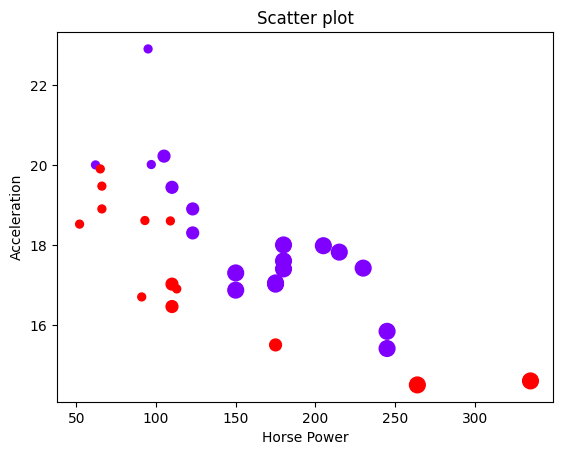

In [31]:
# We use now colour and size parameters 

plt.scatter(mtcars["hp"], mtcars["qsec"], 
            c=mtcars["am"],          # change color
            s=(2*mtcars["cyl"]**2),  # chnage size
            cmap='rainbow')          # change shape

plt.xlabel('Horse Power')
plt.ylabel('Acceleration')
plt.title('Scatter plot')
plt.show()

Now we add legends. Note that we first create separately figure and axes, then we refine axes.

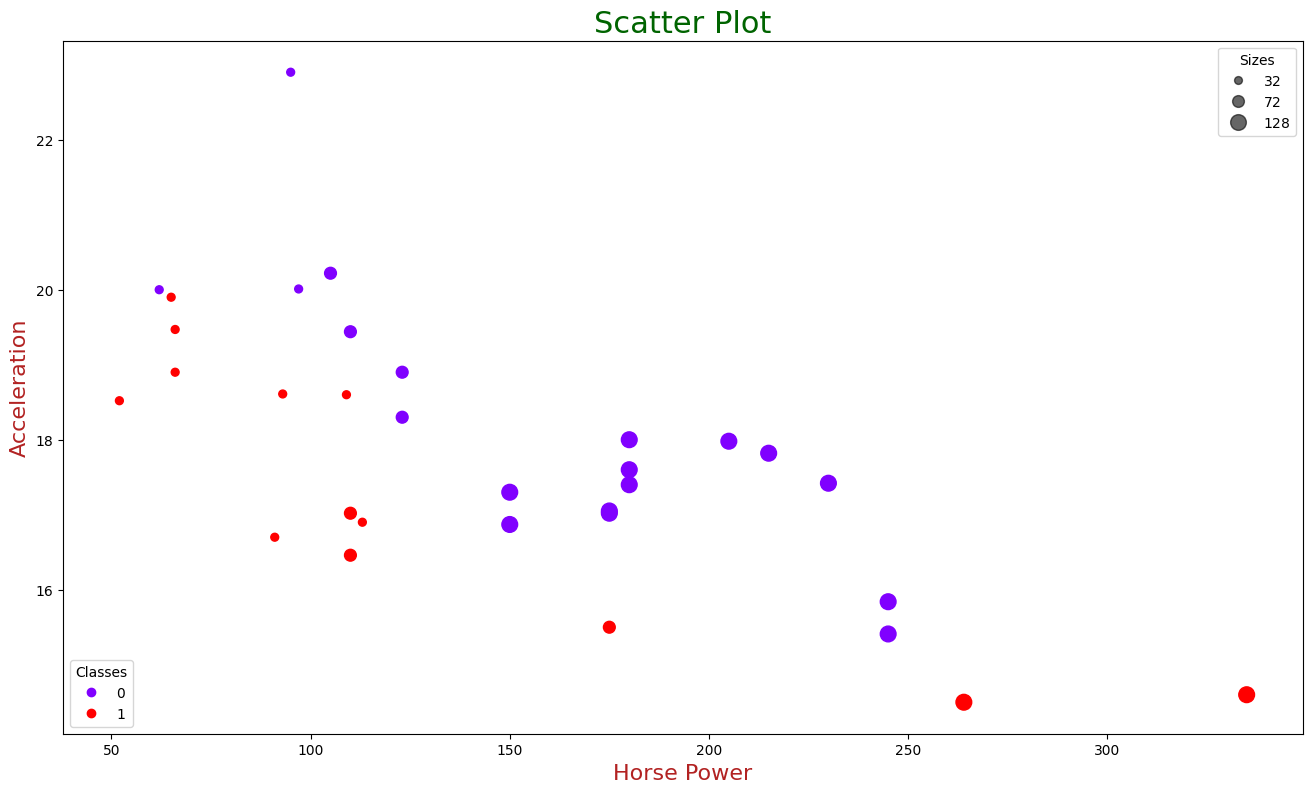

In [48]:
fig, ax = plt.subplots(nrows = 1,
                      ncols = 1,
                      figsize = (16, 9))

scatter = ax.scatter(mtcars['hp'], mtcars['qsec'],
                     c = mtcars['am'],
                     s = 2*mtcars['cyl']**2,
                     cmap = 'rainbow')

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = 'lower left',
                    title = 'Classes')

ax.add_artist(legend1)

# produce a legend with sizes from the scatter
handles, labels = scatter.legend_elements(prop = 'sizes',
                                          alpha = 0.6)

legend2 = ax.legend(handles, labels, 
                    loc = 'upper right',
                    title = 'Sizes')

# add some fancy fonts for title
fontTitle = {'family': 'sans-serif',
             'color': 'darkgreen',
             'weight': 'normal',
             'size': 22}

fontLabel = {'family': 'sans-serif',
             'color': 'firebrick',
             'weight': 'normal',
             'size': 16}

plt.xlabel('Horse Power', fontdict = fontLabel)
plt.ylabel("Acceleration", fontdict = fontLabel)
plt.title('Scatter Plot', fontdict = fontTitle)

# final plot
plt.show()


Same with *seaborn* package now, which is built on top of *pyplot*. $scatterplot$ functions typically allow a nicer layout with few parameters and less coding (check documentation), but if you want a precise definition sometimes you have to use pyplot commands .

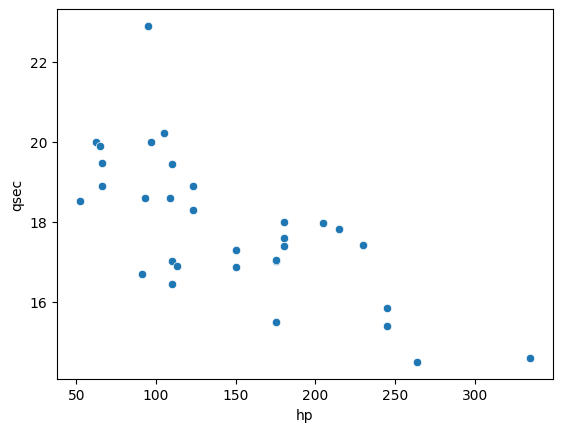

In [49]:
ax = sns.scatterplot(x = 'hp',
                     y = 'qsec',
                     data = mtcars)

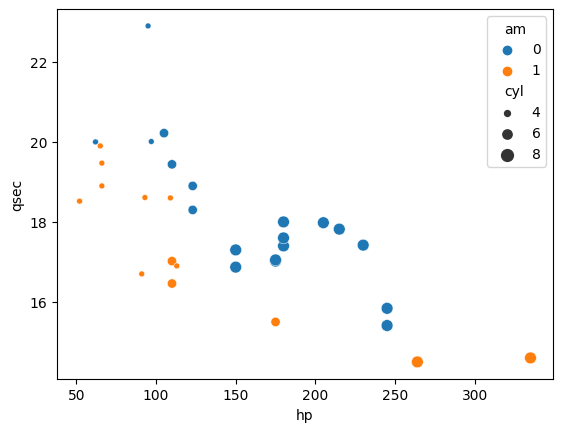

In [50]:
ax = sns.scatterplot(x = 'hp',
                     y = 'qsec',
                     hue = 'am',
                     data = mtcars,
                     size = 'cyl')

Now with **plotly**. Recall we have the following columns:

In [51]:
mtcars.columns

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

In [56]:
mtcars['am_str'] = mtcars.am.astype(str)
mtcars['mpg_sq'] = mtcars.mpg**2

fig = px.scatter(mtcars,
                 x = 'hp',
                 y = 'qsec',
                 color = 'am_str',
                 size = 'mpg_sq',
                 hover_data = ['mpg', 'cyl', 'qsec', 'am', 'wt'],
                 hover_name = 'model')

fig.show()

**Plotly** is a very interesting and useful tool. I invite you to check out a bit more of its features on https://plotly.com/python/plotly-express/.

### Line plot

We will start again with a simple **matplotlib**, then will evolve a bit.

Let's first plot a simple function, by defining a range of inputs. We can define separately figure and axes.

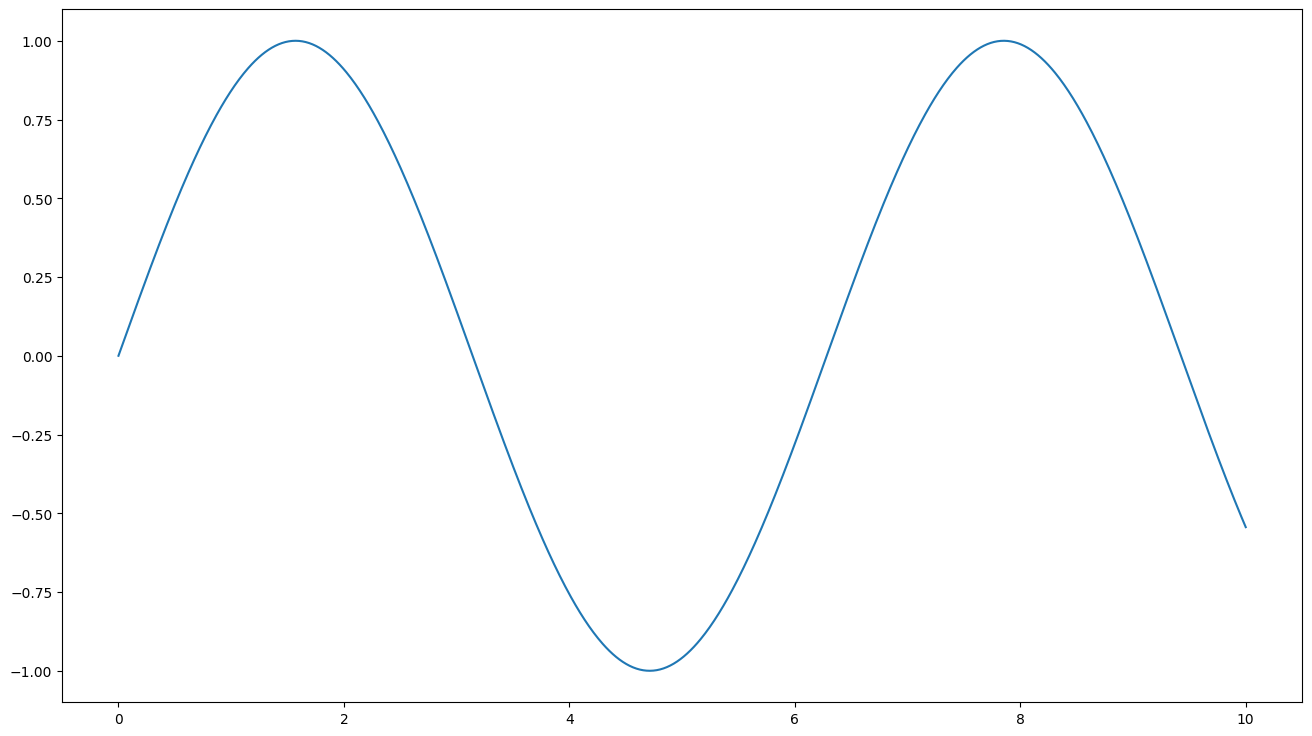

In [61]:
fig = plt.figure(figsize = (16, 9))
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x))

Or we can create all at the same time if the plot is simple, and even overlap an extra plot.

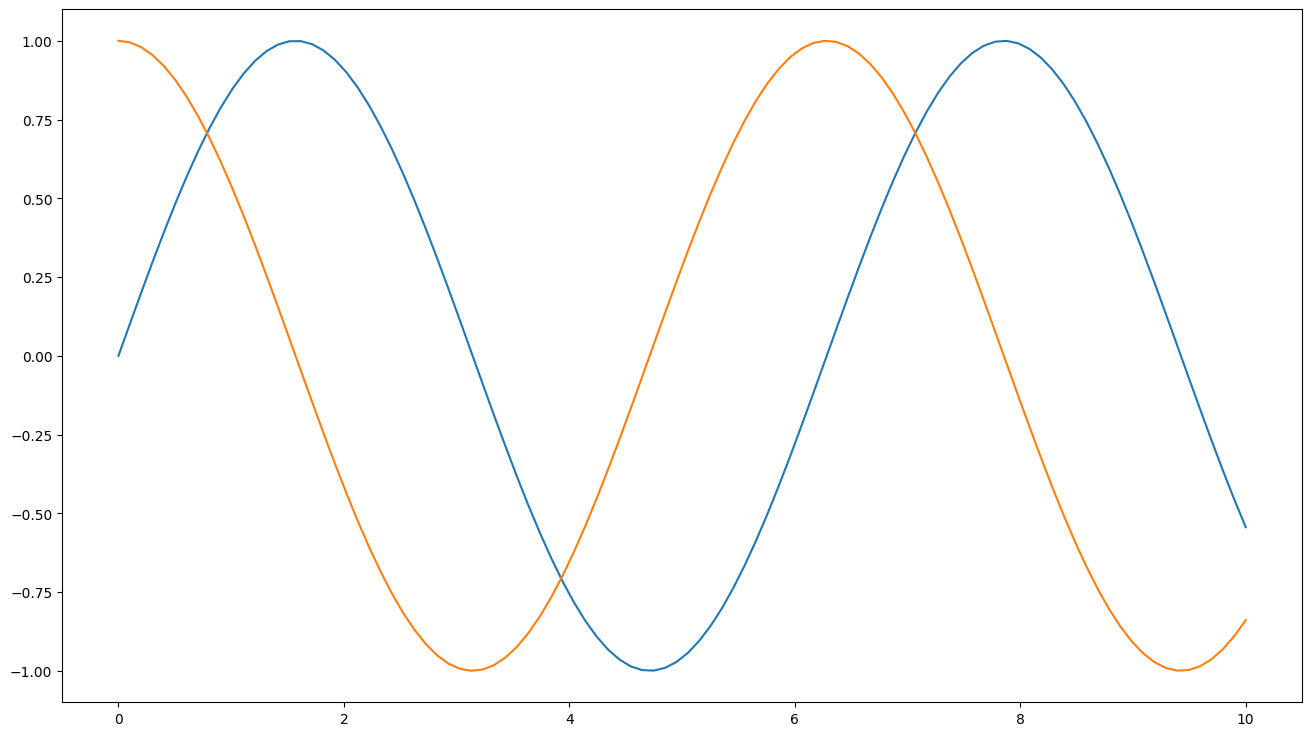

In [63]:
fig = plt.figure(figsize = (16, 9))
ax = plt.axes()

x = np.linspace(0, 10, 100)
ax.plot(x, np.sin(x))
ax.plot(x, np.cos(x))

In this last example, note how to define particular details of the plot in one shot using $ax.set$. If you don't use $ax.set$, you can split plot tasks as we did in our scatter plots (e.g. functions $ax.title$, etc).

More on aesthetics with matlib.pyplot at https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.lines.Line2D.html

[(0.0, 10.0),
 (-2.0, 2.0),
 Text(0.5, 0, 'X value'),
 Text(0, 0.5, 'Result'),
 Text(0.5, 1.0, 'Line Plot')]

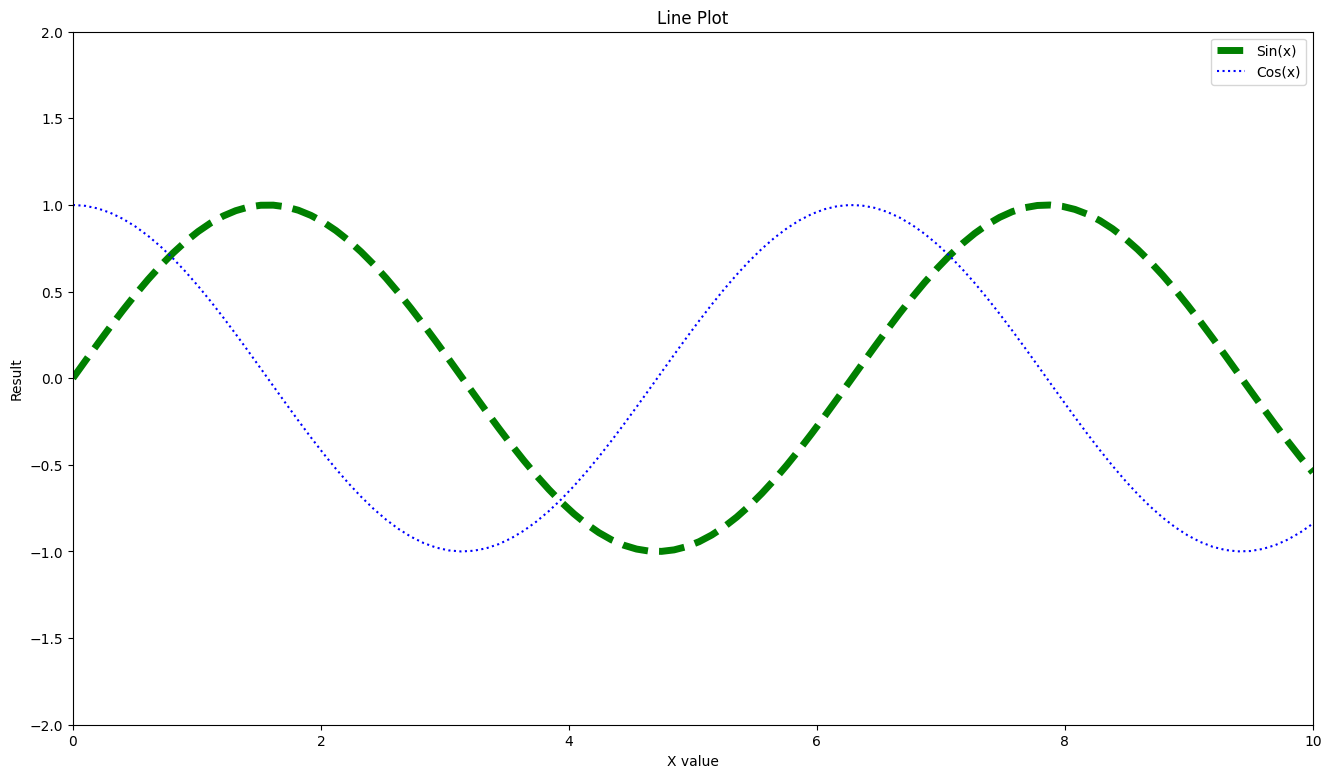

In [70]:
fig = plt.figure(figsize = (16, 9))
ax = plt.axes()

ax.plot(x, np.sin(x),
        label = 'Sin(x)',
        color = 'green',
        linestyle = 'dashed',
        linewidth = 5)

ax.plot(x, np.cos(x),
        label = 'Cos(x)',
        color = 'blue',
        linestyle = 'dotted')

ax.legend()
ax.set(xlim = (0, 10),
       ylim = (-2, 2),
       xlabel = 'X value',
       ylabel = 'Result',
       title = 'Line Plot')

We will build now an equivalent plot using ***seaborn***.

Some hints to choose color palettes in *matplotlib* (also useful for *seaborn*) can be found here: https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html

[(0.7561707035755478, 0.21038062283737025, 0.22352941176470587),
 (0.940715109573241, 0.6099192618223759, 0.4812764321414839),
 (0.9856978085351787, 0.8889657823913879, 0.8320645905420992),
 (0.8605151864667436, 0.9174163783160324, 0.9487120338331411),
 (0.530026912725875, 0.7456362937331797, 0.8560553633217994),
 (0.1843137254901961, 0.47266435986159167, 0.7116493656286044)]

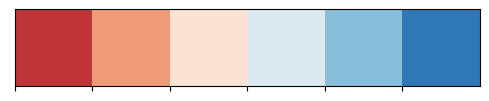

In [71]:
sns.palplot(sns.color_palette('RdBu'))
sns.color_palette('RdBu')

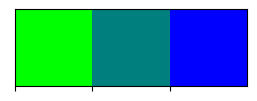

In [74]:
mypalette = [(0,1,0), (0,0.5,0.5), (0,0,1)]
sns.set_palette(sns.color_palette(mypalette))
sns.palplot(sns.color_palette(mypalette))

In [75]:
# controlling aesthethics
sns.set_palette(sns.color_palette(mypalette))
sns.set_style('whitegrid',
              {'axes.grid': False})
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'axes.grid': False,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

In [79]:
# build a dataset
data = {'x': x,
        'Sin(x)': np.sin(x),
        'Cos(x)': np.cos(x),}

df = pd.DataFrame(data)
df.head()


,x,Sin(x),Cos(x)
0,0.00000,0.000000,1.000000
1,0.10101,0.100838,0.994903
2,0.20202,0.200649,0.979663
3,0.30303,0.298414,0.954437
4,0.40404,0.393137,0.919480


In [80]:
df = pd.melt(df,
             id_vars = ['x'],
             var_name = 'function',
             value_name = 'result')

df.head()

,x,function,result
0,0.00000,Sin(x),0.000000
1,0.10101,Sin(x),0.100838
2,0.20202,Sin(x),0.200649
3,0.30303,Sin(x),0.298414
4,0.40404,Sin(x),0.393137


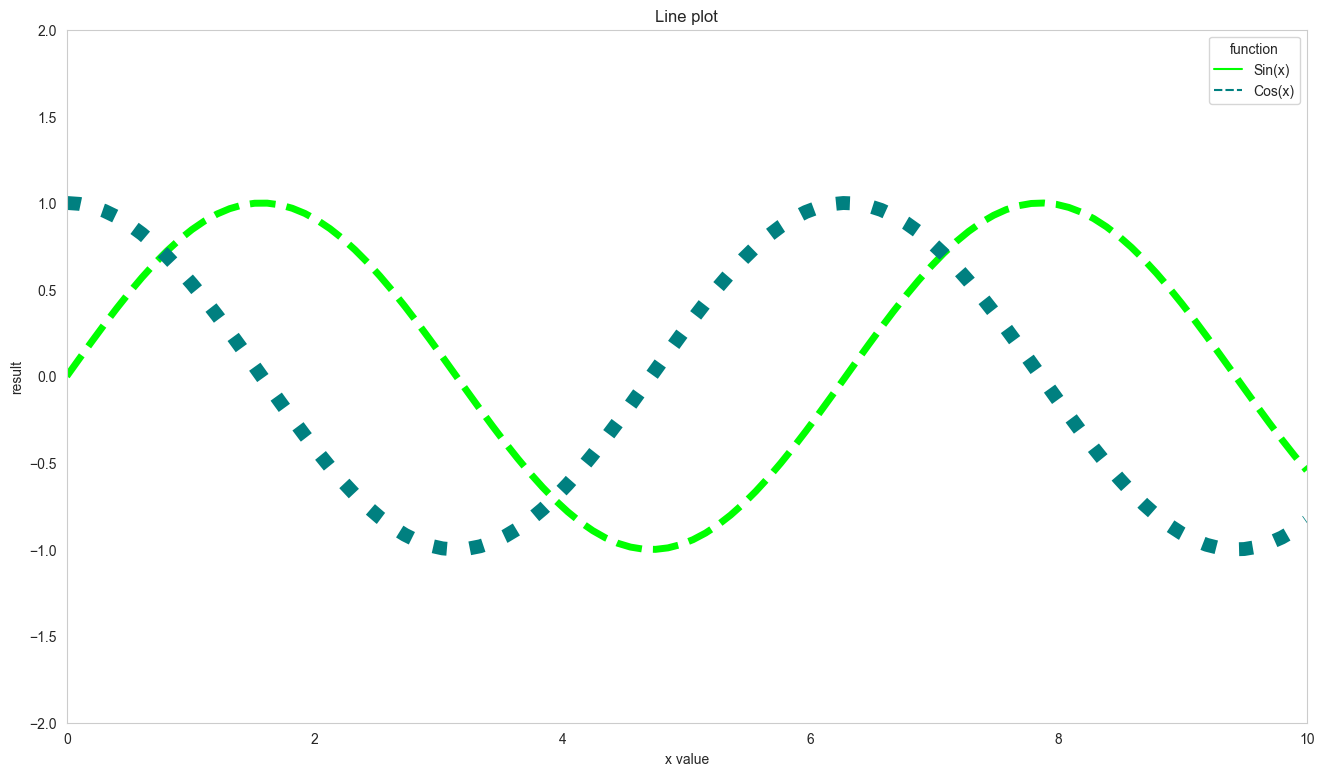

In [85]:
# plot
fig = plt.figure(figsize = (16,9))
ax = sns.lineplot(x = "x",
                  y = "result",
                  hue = "function",
                  style = "function",
                  data = df)

ax.set(xlim = (0, 10),
       ylim = (-2, 2),
       xlabel = "x value",
       ylabel = "result",
       title = "Line plot")

ax.lines[0].set_linestyle('--')
ax.lines[1].set_linestyle(':')
ax.lines[0].set_linewidth(5)
ax.lines[1].set_linewidth(10)

A wrapper for **sns.lineplot** and **sns.scatter** is using always **sns.relplot** and then specify kind='lineplot' or kind='scatter'.

### Time series plots

Now let's see how to plot **time series**, using web visit counts of different Wikipidia pages.

We will work only on a selected subset of pages.

In [88]:
# data modified from https://www.kaggle.com/c/web-traffic-time-series-forecasting/data
wiki = pd.read_csv('https://github.com/barcelonagse-datascience/academic_files/raw/master/data/WikiData.csv')

wiki.head()

,page,date,count
0,Spécial:Connexion_fr,2015-07-01,12594
1,Java_(programming_language)_en,2015-07-01,3941
2,Lali_Espósito_en,2015-07-01,115
3,Spécial:Connexion_fr,2015-07-01,21273
4,Barack_Obama_en,2015-07-01,28422


In [110]:
# we subset to select only some wikipedia pages
wiki = pd.read_csv('https://github.com/barcelonagse-datascience/academic_files/raw/master/data/WikiData.csv')
top = wiki.groupby(['page']).sum().sort_values('count', ascending = False).reset_index(drop= False)

selected = top.loc[17:22, 'page']
print(selected)

wiki = wiki[wiki['page'].isin(selected)]
print(wiki.shape)



17            Captain_America:_Civil_War_en
18                          Barack_Obama_en
19    Batman_v_Superman:_Dawn_of_Justice_en
20                         Melania_Trump_en
21                                Google_en
22                       Game_of_Thrones_en
Name: page, dtype: object
(3300, 3)


C:\Users\wangc\AppData\Local\Temp\ipykernel_13572\2498717855.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [113]:
# some processing of date and filling na

wiki['date2'] = wiki['date'].astype('datetime64[ns]')
wiki = wiki.fillna(0)
wiki.head()

C:\Users\wangc\AppData\Local\Temp\ipykernel_13572\2542474794.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,page,date,count,date2
4,Barack_Obama_en,2015-07-01,28422,2015-07-01
7,Game_of_Thrones_en,2015-07-01,42619,2015-07-01
13,Batman_v_Superman:_Dawn_of_Justice_en,2015-07-01,16344,2015-07-01
14,Captain_America:_Civil_War_en,2015-07-01,18046,2015-07-01
16,Google_en,2015-07-01,48736,2015-07-01


In [114]:
# collapse by page and date
wiki = wiki.groupby(['page', 'date2']).sum().reset_index(drop=False).sort_values(by=['date2'])
wiki.head()

C:\Users\wangc\AppData\Local\Temp\ipykernel_13572\1293989792.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,page,date2,count
0,Barack_Obama_en,2015-07-01,28422
2200,Google_en,2015-07-01,48736
1650,Game_of_Thrones_en,2015-07-01,42619
1100,Captain_America:_Civil_War_en,2015-07-01,18046
2750,Melania_Trump_en,2015-07-01,16143


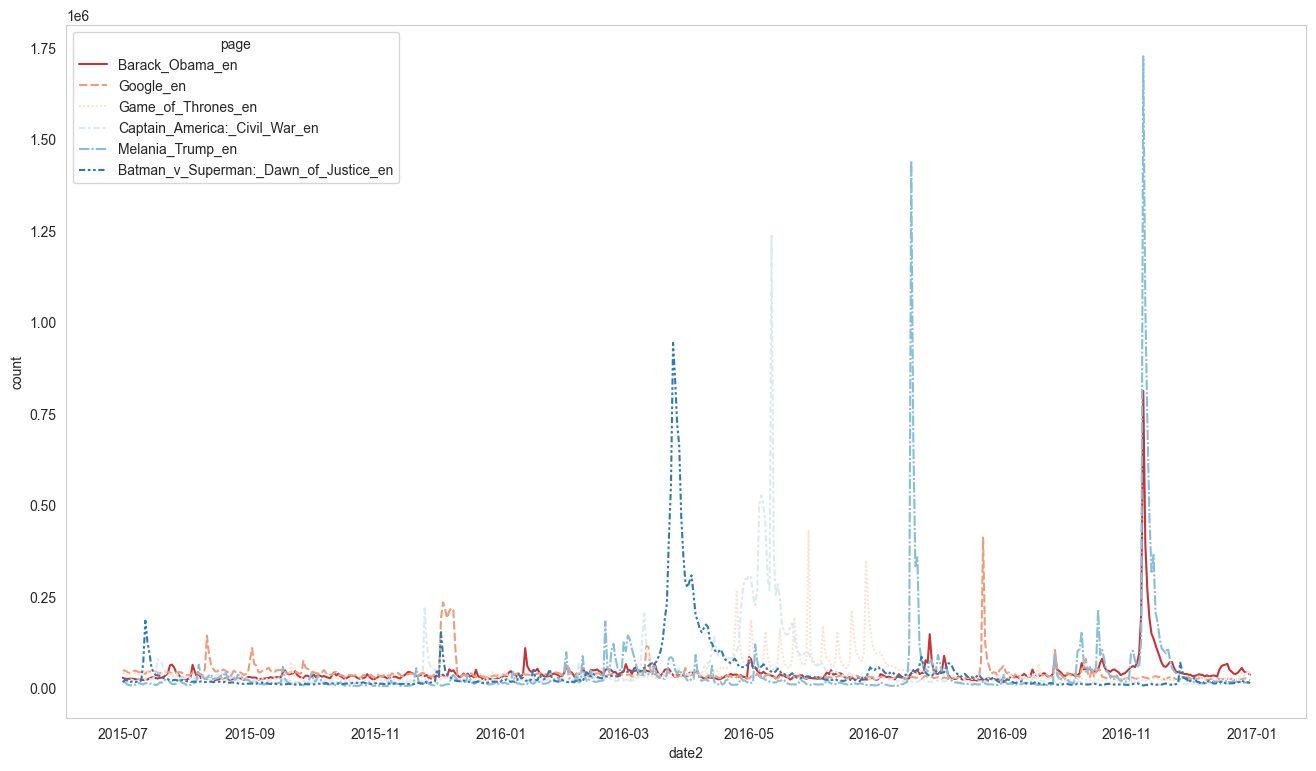

In [116]:
# line plot
fig = plt.figure(figsize=(16, 9))
ax = sns.lineplot(x = 'date2',
                  y = 'count',
                  hue = 'page',
                  style = 'page',
                  data = wiki,
                  palette = 'RdBu')

In [119]:
# slight variation: stacked area line plot
# transform data first
df_pivot = wiki.pivot(index = 'date2',
                      columns = 'page',
                      values = 'count',)

df_pivot.fillna(0)
df_pivot = df_pivot[df_pivot.index < '2016-05-01']

df_pivot.head()

page,Barack_Obama_en,Batman_v_Superman:_Dawn_of_Justice_en,Captain_America:_Civil_War_en,Game_of_Thrones_en,Google_en,Melania_Trump_en
date2,,,,,,
2015-07-01,28422,16344,18046,42619,48736,16143
2015-07-02,26087,22610,16965,40759,47986,16625
2015-07-03,25254,21567,15895,38163,45212,10654
2015-07-04,25659,16963,19470,38153,40972,8046
2015-07-05,25946,17507,23668,42783,42400,7845


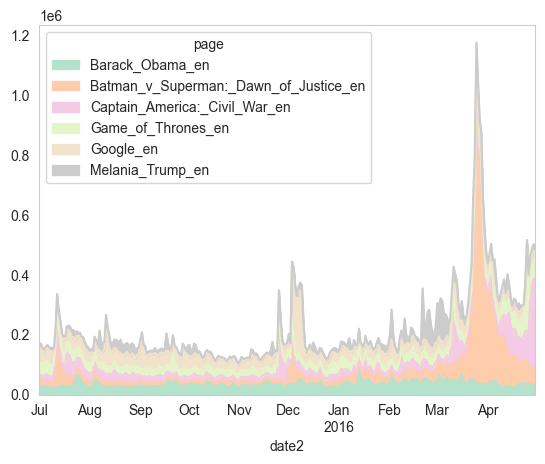

In [120]:
my_page = df_pivot.columns
ax = df_pivot.plot.area(colormap = 'Pastel2')

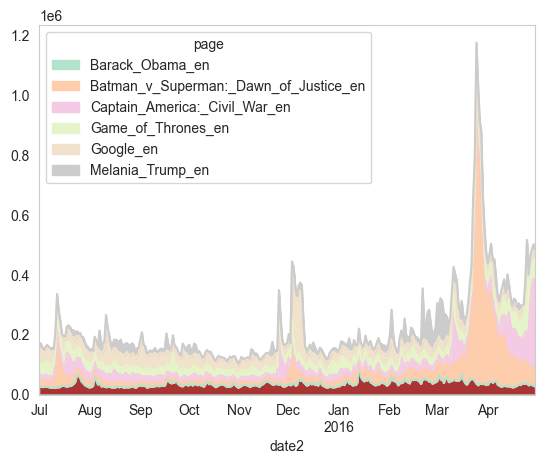

In [121]:
# modify one colour a posteriori
ax = df_pivot.plot.area(colormap = 'Pastel2')
ax.collections[0].set_facecolor('#aa3333')

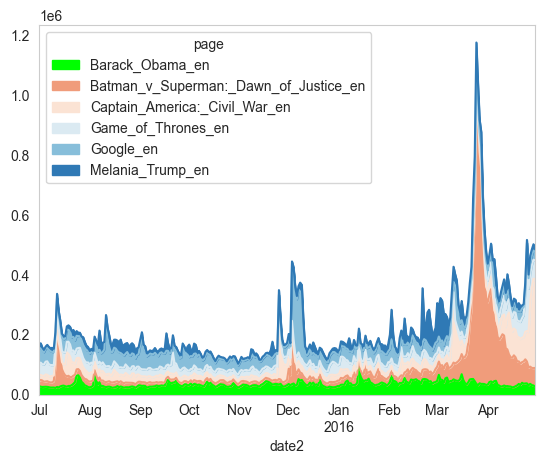

In [123]:
# use a modified color palette from the beggining
mypalette = sns.color_palette('RdBu')
mypalette[0] = (0,1,0) # RGB
ax = df_pivot.plot.area(color = sns.color_palette(mypalette))

If more than one data per date is found, one can plot a line plot plus a confidence interval using **relplot**. Standard 95% confidence interval are computed by bootstrapping. Now we are plotting average + confidence intervals visits per date to wikipedia pages (the ones that we have in our dataset).

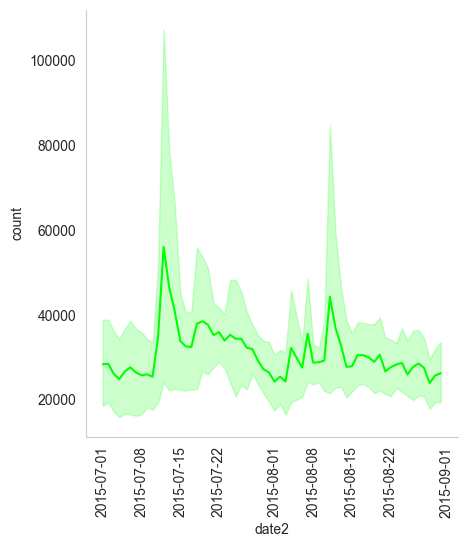

In [126]:
# aggreage by date adding confidence interval using seaborn
sns.relplot(x = 'date2',
            y = 'count',
            kind = 'line',
            data = wiki[wiki.date2 < '2015-09-01'])

plt.xticks(rotation = 90)
plt.show()

Some more line plots with **plotly**

In [128]:
stock_df = px.data.stocks()
stock_df.columns

Index(['date', 'GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX', 'MSFT'], dtype='object')

In [130]:
px.line(stock_df, 
        x = 'date',
        y = ['AAPL', 'AMZN'],
        labels = {'date': 'Date', 'value': 'Return relative to Jan 2018'})

### Exploration plots: 
+ barplots
+ histograms
+ boxplots
+ violinplots
+ heatmaps
+ and more
We will showcase quickly each type of plot.

### Barplots
Useful to show one single value per discrete category.

If more than one value present *seaborn* barplot computes average value and adds standard deviation range.

In [132]:
wiki['year'] = wiki['date2'].dt.year
wiki.head()

,page,date2,count,year
0,Barack_Obama_en,2015-07-01,28422,2015
2200,Google_en,2015-07-01,48736,2015
1650,Game_of_Thrones_en,2015-07-01,42619,2015
1100,Captain_America:_Civil_War_en,2015-07-01,18046,2015
2750,Melania_Trump_en,2015-07-01,16143,2015


Text(0.5, 0, 'Wiki report')

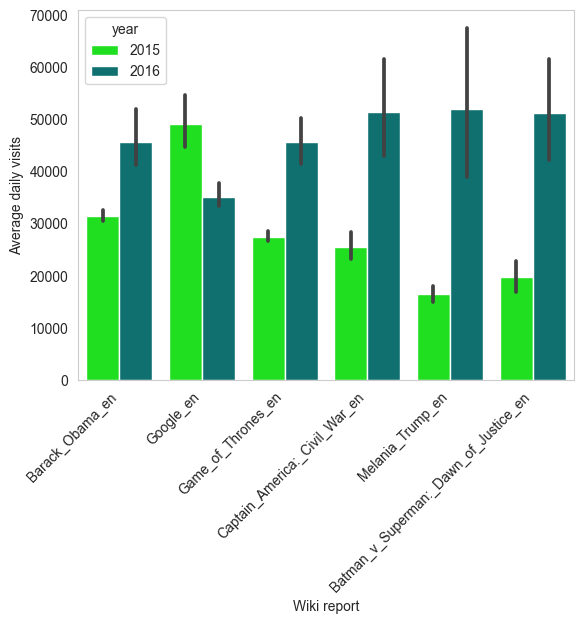

In [136]:
ax = sns.barplot(data = wiki,
                 x = 'page',
                 y = 'count',
                 hue = 'year')

ax.set_xticklabels(ax.get_xticklabels(), 
                   rotation = 45,
                   ha = 'right',)

ax.set_ylabel('Average daily visits')
ax.set_xlabel('Wiki report')

### Boxplots

Boxplot show median +25% and 75% quartiles, plus a visual estimate of outliers. 

<img src="https://github.com/barcelonagse-datascience/academic_files/raw/master/images/boxplotparts.png" width=70%>

Figure and extended explanations can be found in <a href="https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51"> this link.</a> 

In [137]:
wiki.head()

,page,date2,count,year
0,Barack_Obama_en,2015-07-01,28422,2015
2200,Google_en,2015-07-01,48736,2015
1650,Game_of_Thrones_en,2015-07-01,42619,2015
1100,Captain_America:_Civil_War_en,2015-07-01,18046,2015
2750,Melania_Trump_en,2015-07-01,16143,2015


Text(0.5, 1.0, 'Wiki report')

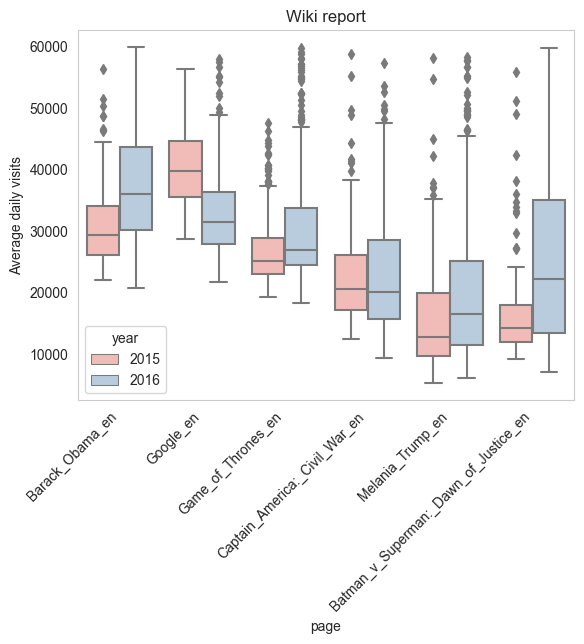

In [145]:
# reduce dispersion of data just for didactic purposes
wiki = wiki[wiki['count'] < 60000]

# use seaborn
sns.set_palette(sns.color_palette('Pastel1'))
ax = sns.boxplot(x = 'page',
                 y = 'count',
                 hue = 'year',
                 data = wiki)

ax.set_xticklabels(ax.get_xticklabels(), 
                   rotation = 45,
                   ha = 'right')

ax.set_ylabel('Average daily visits')
ax.set_title('Wiki report')



If you just need a quick boxplot for exploratory purposes, you can use directly *pandas* functions, which are a bit more limited. Check the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) for extra options.

In [146]:
px.box(wiki,
       x = 'page',
       y = 'count',
       color = 'year')

<AxesSubplot: title={'center': 'count'}, xlabel='[page]'>

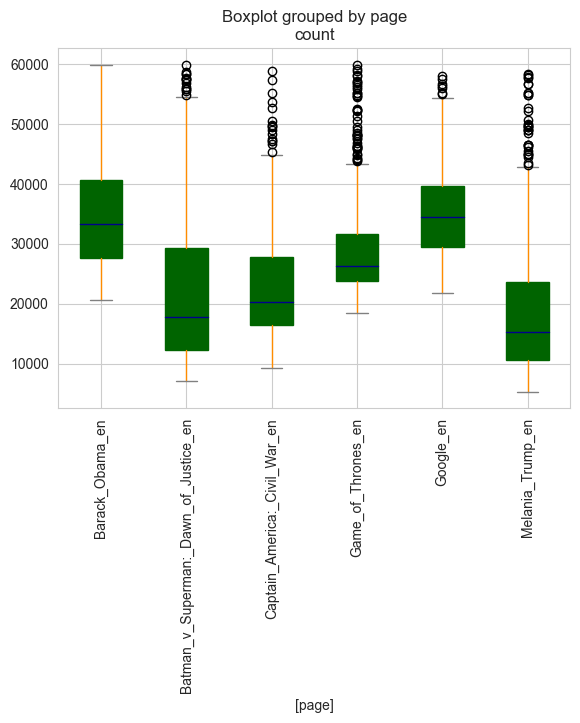

In [156]:
# quick boxplot
props = dict(boxes = "DarkGreen",
             whiskers = 'DarkOrange',
             medians = 'DarkBlue',
             caps = 'Gray')
wiki.drop('year',
          axis = 1).boxplot(by = ['page'],
                            rot = 90,
                            color = props,
                            patch_artist = True)

### Violinplots

Violinplots are very similar to boxplot, but they give more granular information, basically the distribution of data, not only median and quartiles.

Text(0.5, 1.0, 'Wiki report')

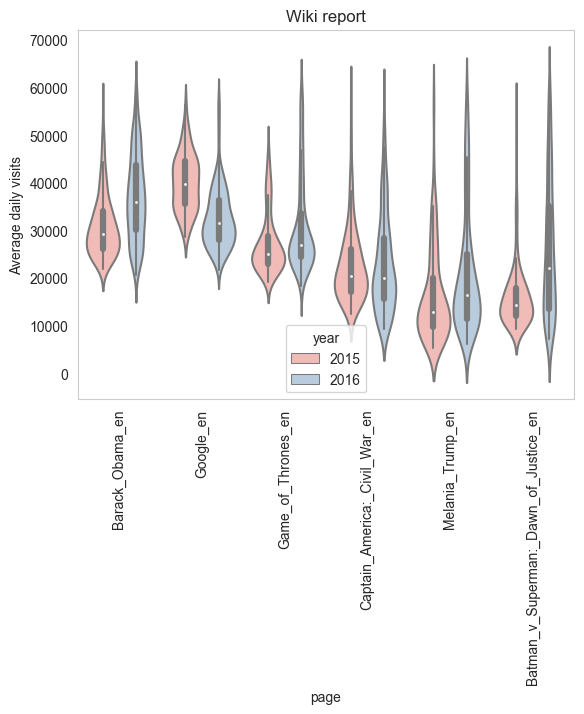

In [160]:
ax = sns.violinplot(x = 'page',
                    y = 'count',
                    hue = 'year',
                    data = wiki,
                    palette = sns.color_palette('Pastel1'))

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_ylabel('Average daily visits')
ax.set_title('Wiki report')

### Histograms and density plots

A distribution of certain variable can be discretized in bins and plotted as a histogram, or kept continuous and plot the entire distribution of that particular variable.


Text(0, 0.5, 'Number of cars')

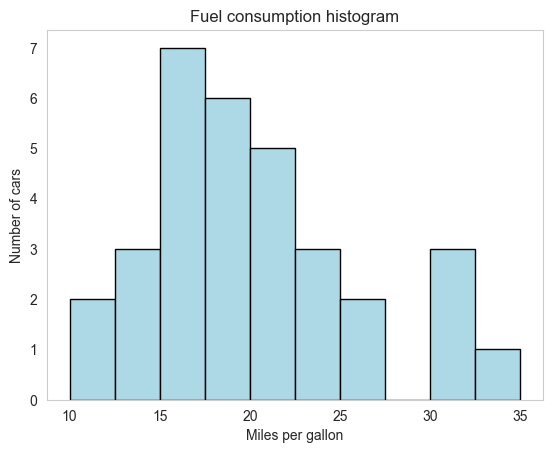

In [164]:
# let's recover the mtcars dataset and use it

mtcars = pd.read_csv('https://github.com/barcelonagse-datascience/academic_files/raw/master/data/mtcars.csv')

plt.hist(mtcars['mpg'],
         bins = 10,
         range = [10, 35],
         color = 'lightblue',
         edgecolor = 'black')
plt.title('Fuel consumption histogram')
plt.xlabel('Miles per gallon')
plt.ylabel('Number of cars')

Text(0, 0.5, 'Number of cars')

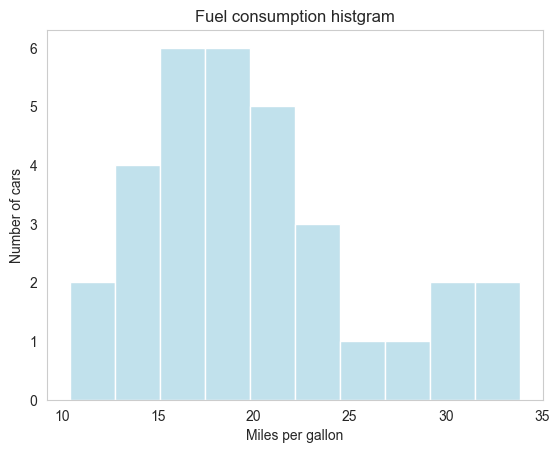

In [166]:
# same plot with seaborn

sns.histplot(mtcars['mpg'],
             bins = 10,
             color = 'lightblue',)

plt.title('Fuel consumption histgram')
plt.xlabel('Miles per gallon')
plt.ylabel('Number of cars')

Text(21.069444444444443, 0.5, 'Number of cars')

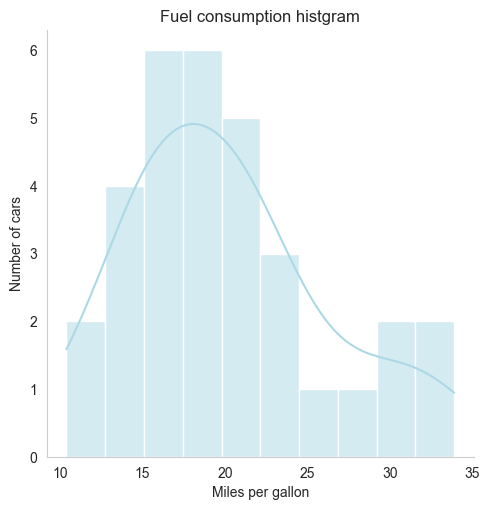

In [168]:
# same with seaborn with a more flexible function

sns.displot(mtcars['mpg'],
            kind='hist',
            kde = True,
            bins = 10,
            color = 'lightblue')

plt.title('Fuel consumption histgram')
plt.xlabel('Miles per gallon')
plt.ylabel('Number of cars')

Text(0.5, 9.444444444444438, 'Miles per gallon')

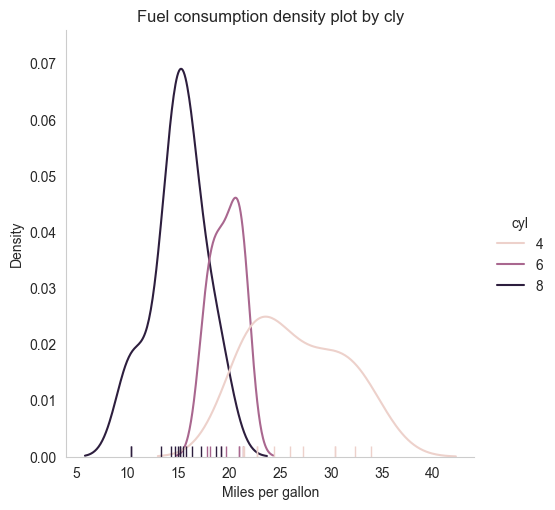

In [170]:
# slice dataframe by syl value

sns.displot(data = mtcars,
            x = 'mpg',
            hue = 'cyl',
            kind = 'kde',
            rug = True)

plt.title('Fuel consumption density plot by cly')
plt.xlabel('Miles per gallon')

c:\Users\wangc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

c:\Users\wangc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

c:\Users\wangc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

c:\Users\wangc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

c:\Users\wangc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



Text(0.5, 0.98, 'Fuel consumption per sylinder and automatic flag')

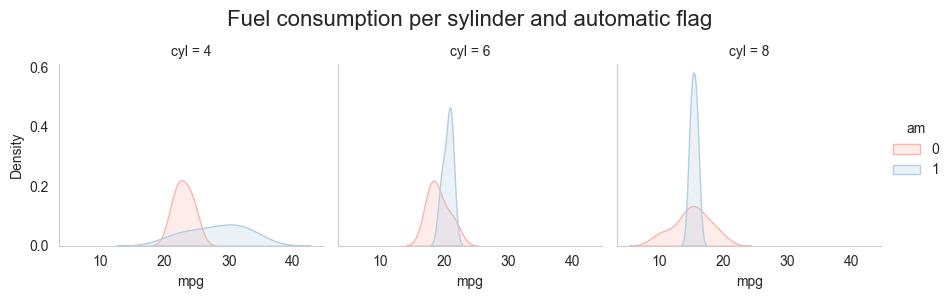

In [173]:
# split even further

g = sns.FacetGrid(mtcars,
                  col = 'cyl',
                  hue = 'am')

g = g.map(sns.kdeplot, 
          'mpg',
          fill = True).add_legend()

g.fig.subplots_adjust(top = 0.8)
g.fig.suptitle('Fuel consumption per sylinder and automatic flag', fontsize = 16)

In [176]:
mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


array([<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
       <AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
       <AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
       <AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
       <AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
       <AxesSubplot: ylabel='Density'>], dtype=object)

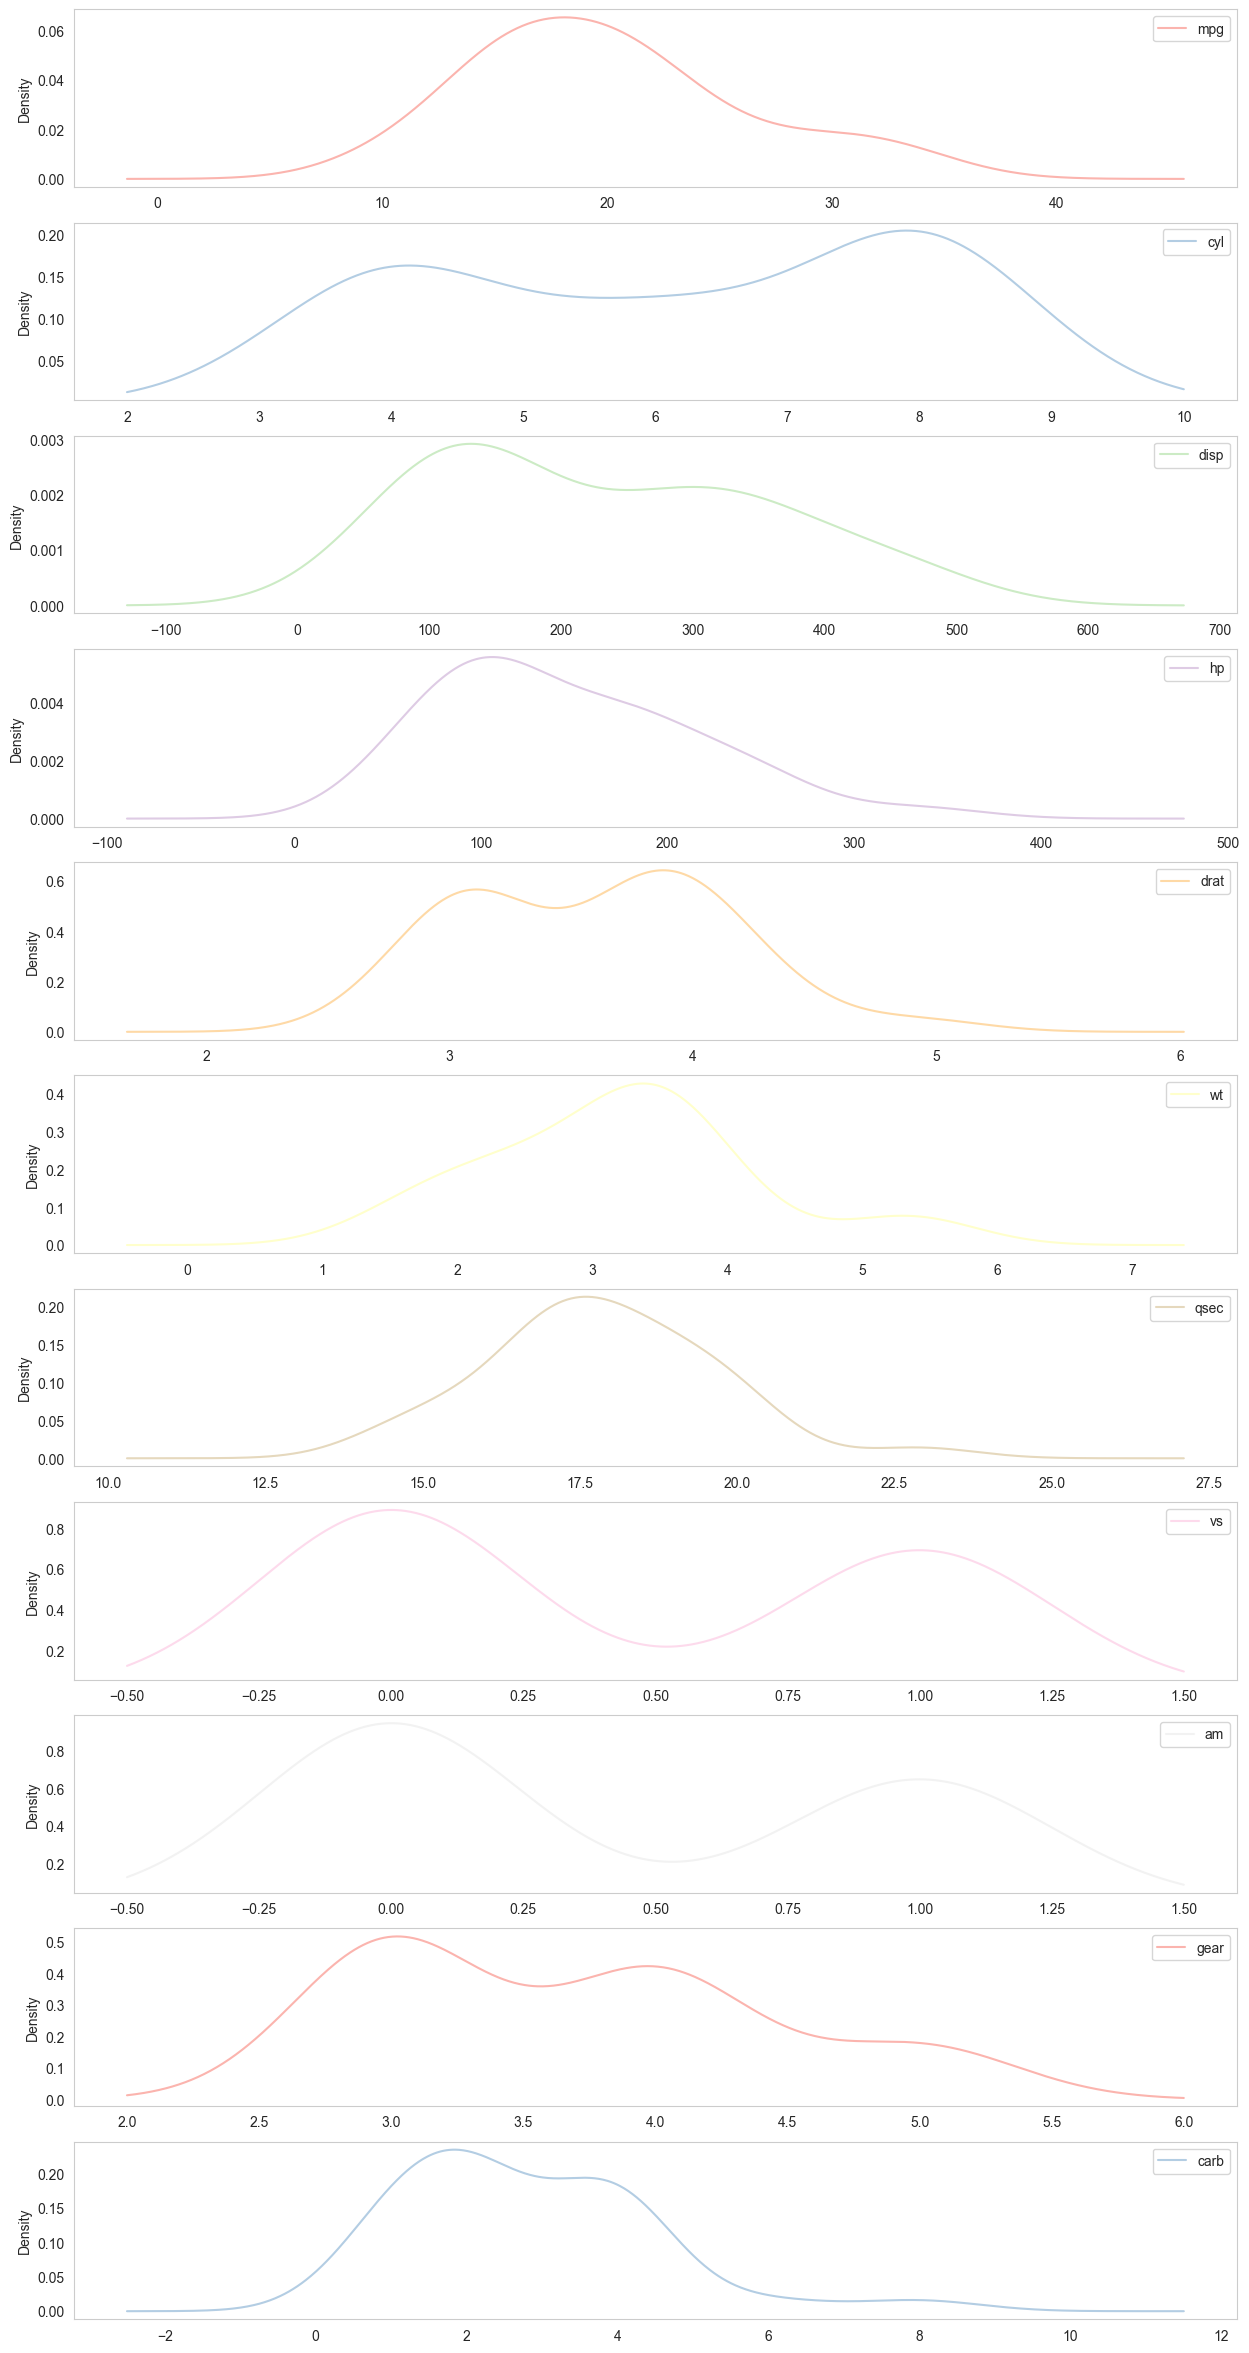

In [175]:
# similar using directly pandas method
# also useful for quick boxplots and histograms
mtcars.plot(kind = 'density',
            subplots = True,
            sharex = False,
            figsize = (15, 30))

### Heatmaps

They are typically pixel grid outputs, where pixel hue is related to a value. With a sensible color palette, one can quickly eyeball data trends.

C:\Users\wangc\AppData\Local\Temp\ipykernel_13572\933271554.py:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'sepal_length'),
  Text(0, 1.5, 'sepal_width'),
  Text(0, 2.5, 'petal_length'),
  Text(0, 3.5, 'petal_width')])

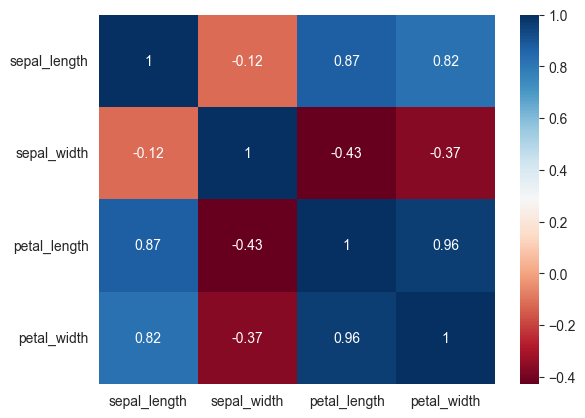

In [179]:
# load data
# flower characteristics per species
iris = sns.load_dataset('iris')
# compute correlations
cor = iris.corr()

# general heatmaps using seaborn
sns.heatmap(cor,
            cmap = 'RdBu',
            annot = True)

plt.yticks(rotation = 0)

In [180]:
# or directly using pandas embedded function
iris.corr().style.background_gradient(cmap = 'coolwarm')

C:\Users\wangc\AppData\Local\Temp\ipykernel_13572\293597395.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


### Adcanced exploration plots
### Correlation plots

A quick alternative to spot feature dependency by plotting in one shot all pairwise correlations together with histgrams, from a padas dataframe.

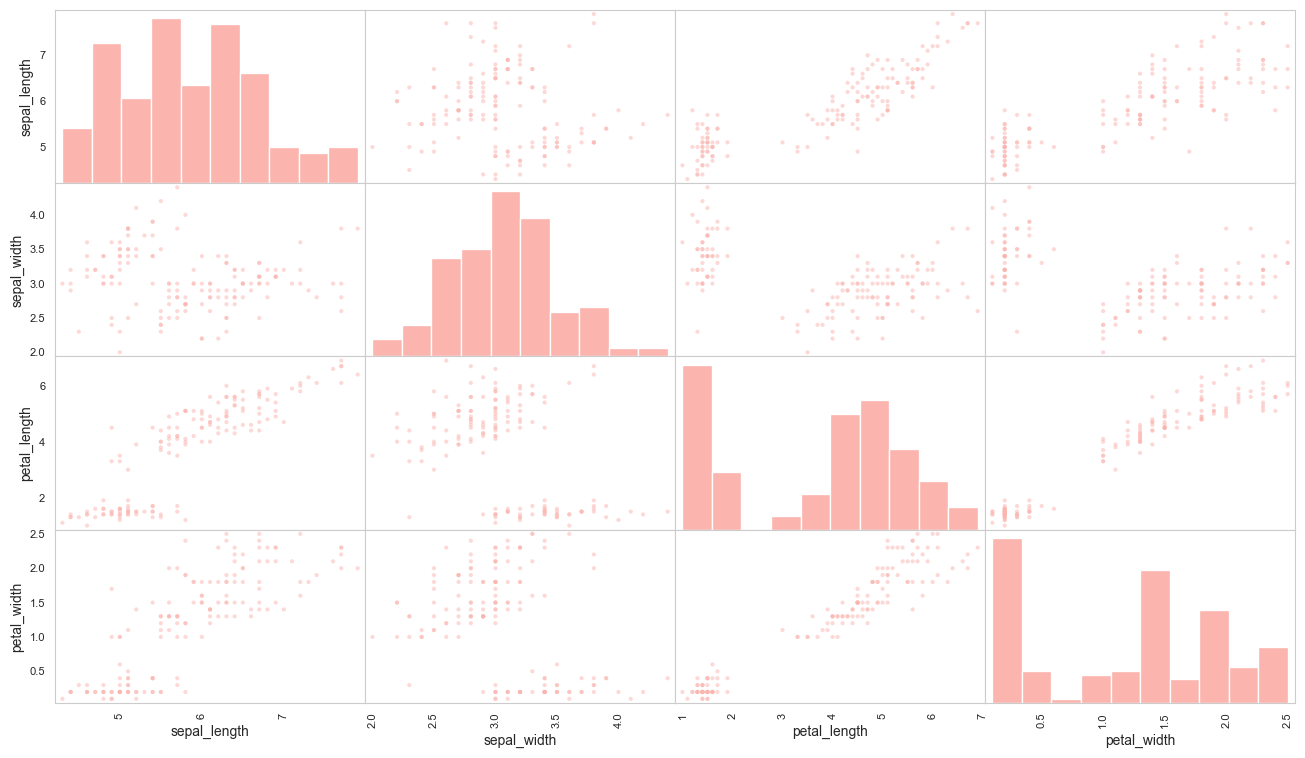

In [185]:
# using iris datafreme
scatter_matrix(iris, figsize = (16, 9))
plt.show()

In [188]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


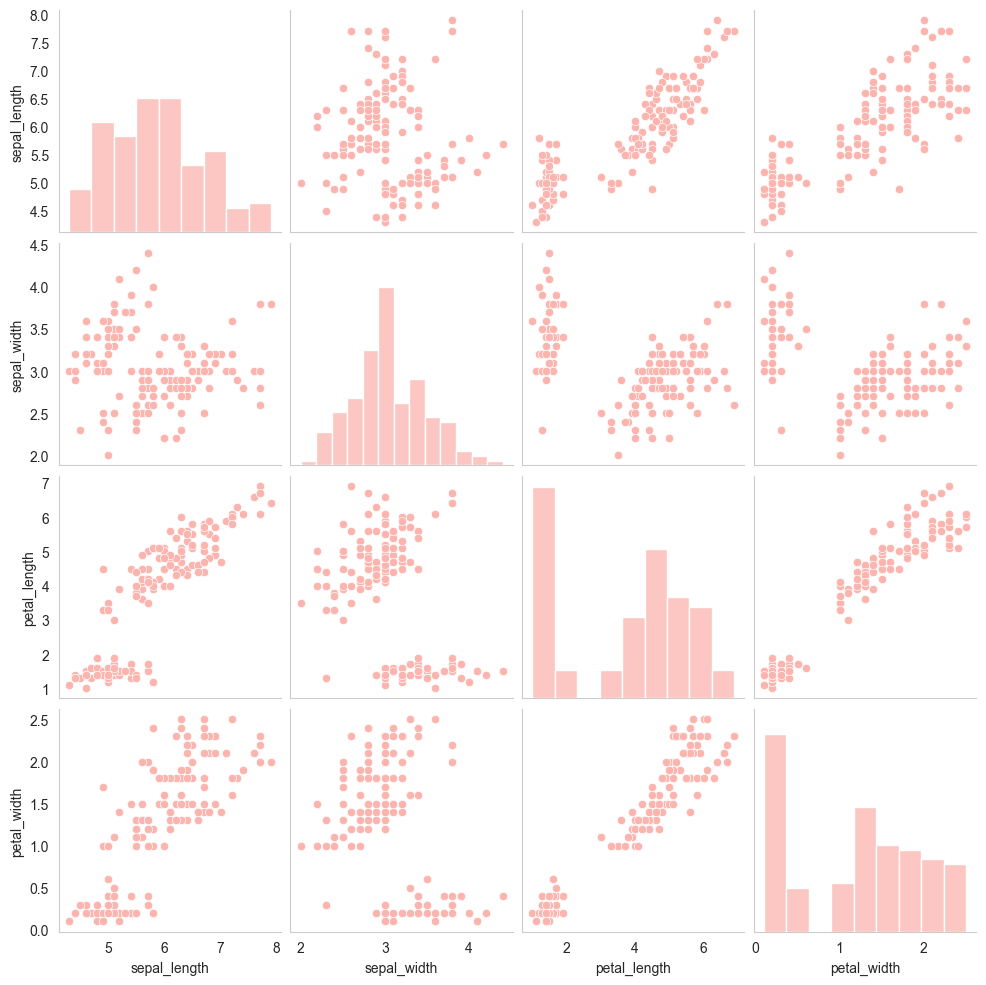

In [187]:
# same with seaborn, showing spacies
sns.pairplot(iris)
plt.show()

### Regression plots


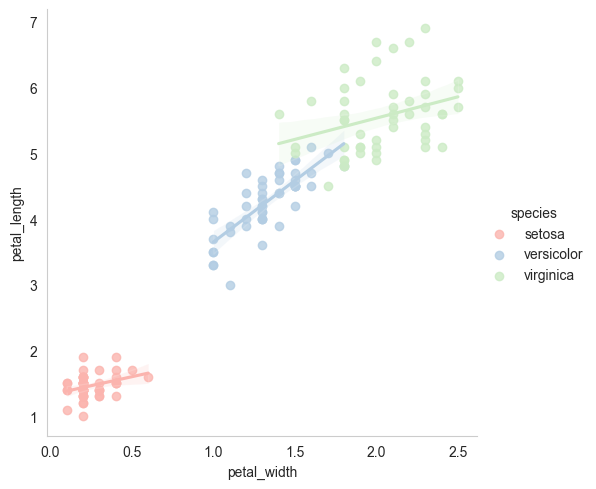

In [192]:
# .lmplot() is a combination of .FacetGrid() and .regplot()
sns.lmplot(data = iris,
           fit_reg = True, 
           hue = 'species',
           x = 'petal_width',
           y = 'petal_length')
plt.show()

Joinplot is a powerful visualization function to plot at the same time scatter points and distribution. Check the [documention](https://seaborn.pydata.org/generated/seaborn.jointplot.html) for details.

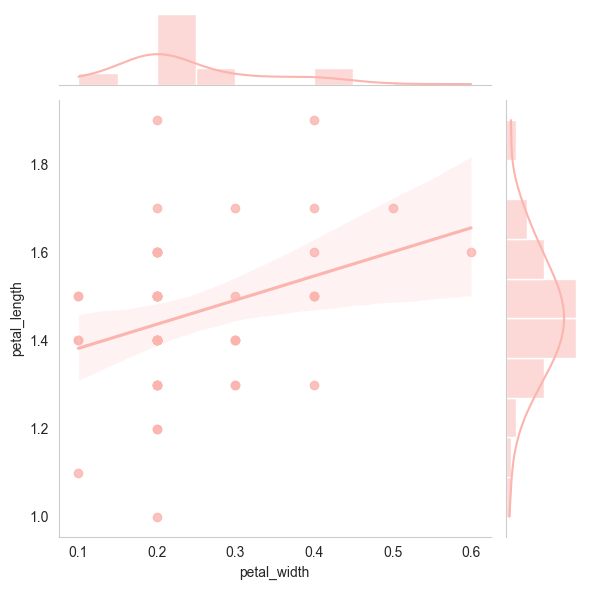

In [195]:
# adding densities on sides
sns.jointplot(data = iris.loc[iris.species=='setosa'],
              kind = 'reg',
              x = 'petal_width',
              y = 'petal_length')
plt.show()

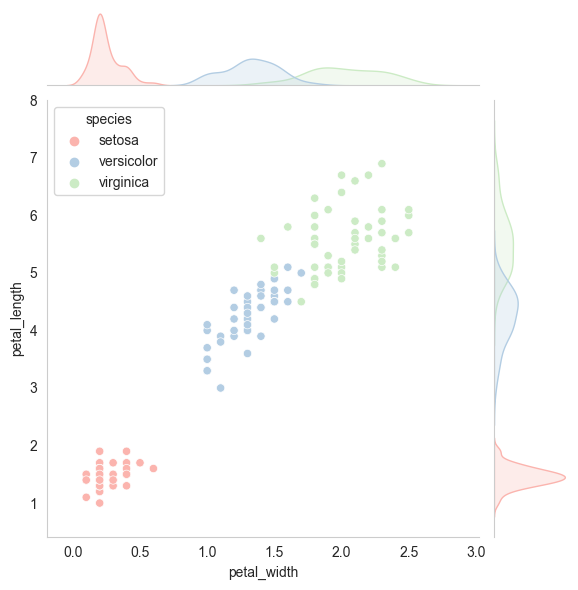

In [196]:
# if you don't nedd regression but want to split by species
sns.jointplot(data = iris,
              hue = 'species',
              x = 'petal_width',
              y = 'petal_length')
plt.show()

### Hints for practioners

### General topics

- **Scales**: You may want to use scaled x or y axis when plotting your data. Use $pyplot.yscale()$ or $pyplot.xscale()$.
    Find some examples in the documentation: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.yscale.html
    
- **Annotations**: You may want to add text to your plots. Use $pyplot.annotate()$ function (https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.annotate.html)

### Interactive plots

You can turn your plots interactive using these libraries:
- Bokeh: https://docs.bokeh.org/en/latest/
- Pygal: http://www.pygal.org/en/latest/index.html
- Plotly: https://plot.ly/python/
- Gleam: https://github.com/dgrtwo/gleam

### Maps
There are many options. Useful libraries are: 
- Matplotlib: https://matplotlib.org/basemap/users/index.html
- Geoplotlib: https://github.com/andrea-cuttone/geoplotlib
- Geopandas: https://geopandas.org/index.html

To build interactive maps, an interesting package is *folium*: https://python-visualization.github.io/folium/


### Network visualization
*NetworkX* is a comprehensive package for network visualization (https://networkx.github.io/)

For interactive network visualization, check *pyvis* library: https://pyvis.readthedocs.io/en/latest/

### Creating interactive dashboards

Both Python and R have their own tools to create html-based interactive dashboards (an alternative to Qlik, Tableau, Spotfire or PowerBI). Check some galleries here for inspiration:

* Python **Dash**:
    * Reference: https://dash.plotly.com/
    * Gallery: https://dash.gallery/Portal/

* Python **Bokeh**:
    * Reference: https://docs.bokeh.org/en/latest/
    * Gallery: https://docs.bokeh.org/en/latest/docs/gallery.html

* R Studio **Shiny**:
    * Reference: https://shiny.rstudio.com/
    * Gallery:  https://shiny.rstudio.com/gallery/

